In [1]:
from evaluation import Evaluator
from pprint import pprint

import sys
sys.path.append("../dataset")
sys.path.append("../models")
from data_loader import DataLoader, playtime_forever_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer
from random_model import RandomModel
from common_neighbors_model import CommonNeighborsModel
from popularity_model import GamePopularityModel
from collaborative_filtering_model import CollaborativeFiltering


Total Number of Features: 3422500


100%|██████████| 500/500 [02:34<00:00,  3.24it/s]


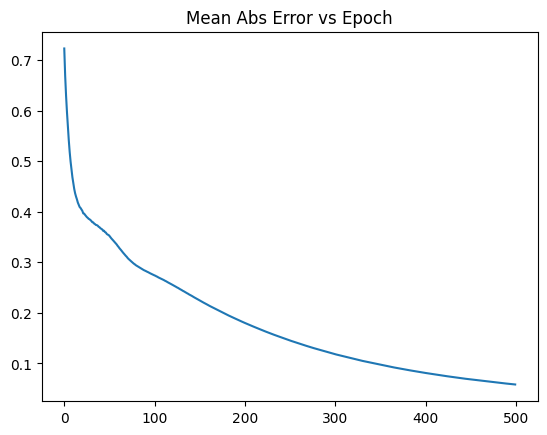

In [2]:
evaluator = Evaluator()

# data_loader = DataLoader()
data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
network = data_loader.get_full_network()
data_loader.load_stratified_user_train_test_network(network=network, train_percentage=0.9, test_percentage=0.1, seed=0)

random_model = RandomModel()
random_model.set_data_loader(data_loader)
random_model.train()

popularity_model = GamePopularityModel()
popularity_model.set_data_loader(data_loader)
popularity_model.train()

common_neighbors_model = CommonNeighborsModel()
common_neighbors_model.set_data_loader(data_loader)
common_neighbors_model.train()

collaborative_filtering_model = CollaborativeFiltering(num_epochs = 500, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 0.001, regularization = 0.00)
collaborative_filtering_model.set_data_loader(data_loader)
collaborative_filtering_model.train(debug=True)


random
{'auc_roc': 0.4975222536073993,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.2001644898104067,
 'positional_error_at_25_user_percentile': 0.0,
 'positional_error_at_50_user_percentile': 0.6666666666666666,
 'positional_error_at_75_user_percentile': 1.3333333333333333,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.0005920663114268798,
 'top_10_hit_percentage_at_25_user_percentile': 0.0,
 'top_10_hit_percentage_at_50_user_percentile': 0.0,
 'top_10_hit_percentage_at_75_user_percentile': 0.0,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.5108670882554409,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



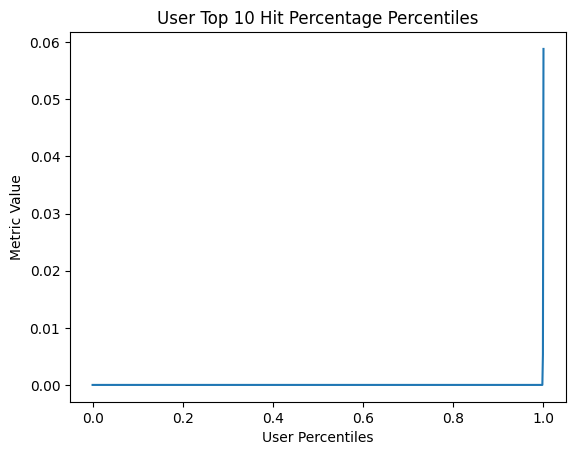

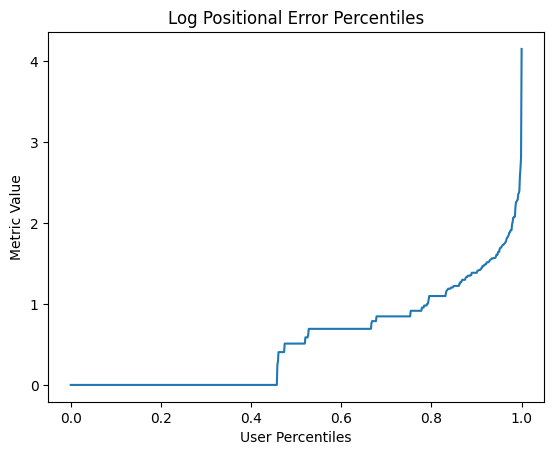

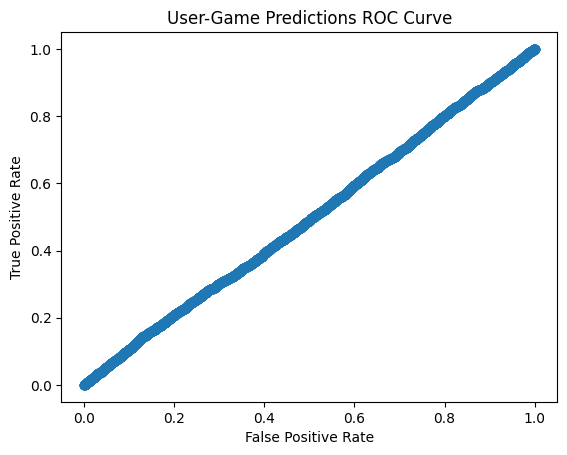

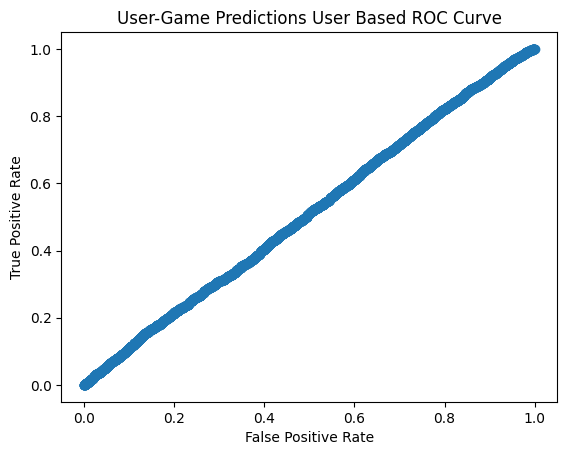

In [3]:
evaluator.reset(random_model)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 75)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 50)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 25)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.compute_user_percentile_positional_error(25)
evaluator.compute_user_percentile_positional_error(50)
evaluator.compute_user_percentile_positional_error(75)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(random_model.name())
pprint(evaluator.metrics)
print()

game_popularity
{'auc_roc': 0.8247246801103846,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.1662474623517265,
 'positional_error_at_25_user_percentile': 0.0,
 'positional_error_at_50_user_percentile': 0.6666666666666666,
 'positional_error_at_75_user_percentile': 1.5,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.14328004736530492,
 'top_10_hit_percentage_at_25_user_percentile': 0.0,
 'top_10_hit_percentage_at_50_user_percentile': 0.0,
 'top_10_hit_percentage_at_75_user_percentile': 0.3333333333333333,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.843464272074524,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



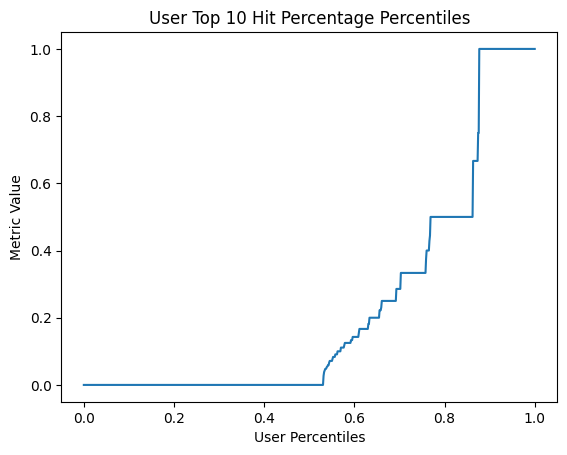

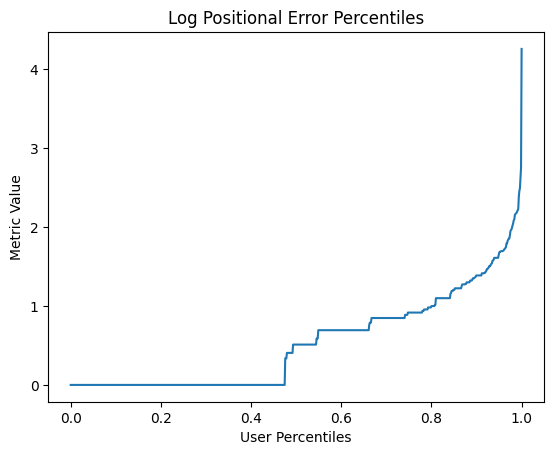

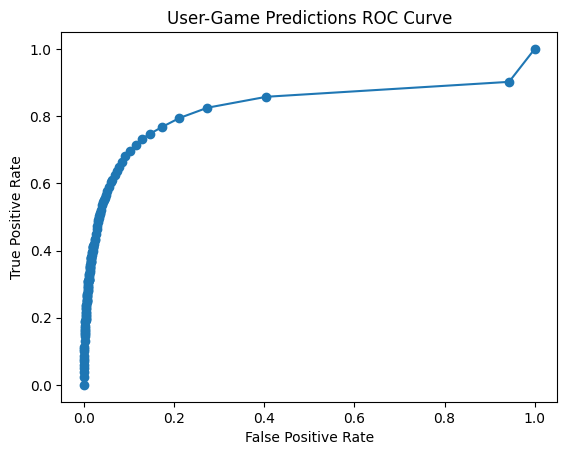

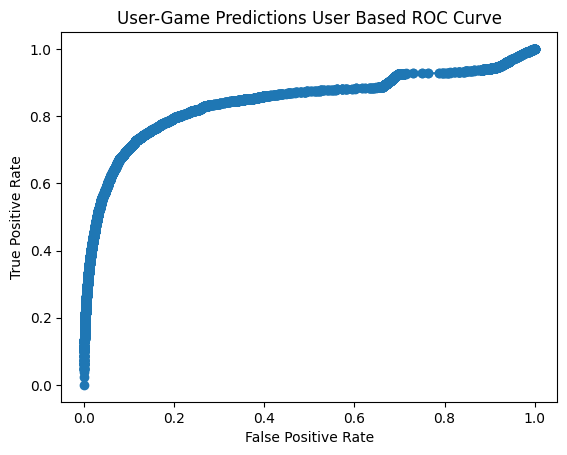

In [4]:
evaluator.reset(popularity_model)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 75)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 50)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 25)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.compute_user_percentile_positional_error(25)
evaluator.compute_user_percentile_positional_error(50)
evaluator.compute_user_percentile_positional_error(75)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(popularity_model.name())
pprint(evaluator.metrics)
print()

common_neighbors
{'auc_roc': 0.866715530959285,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.1329753967734577,
 'positional_error_at_25_user_percentile': 0.0,
 'positional_error_at_50_user_percentile': 0.6666666666666666,
 'positional_error_at_75_user_percentile': 1.5,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.15837773830669036,
 'top_10_hit_percentage_at_25_user_percentile': 0.0,
 'top_10_hit_percentage_at_50_user_percentile': 0.045454545454545456,
 'top_10_hit_percentage_at_75_user_percentile': 0.5,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.8512559907257634,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



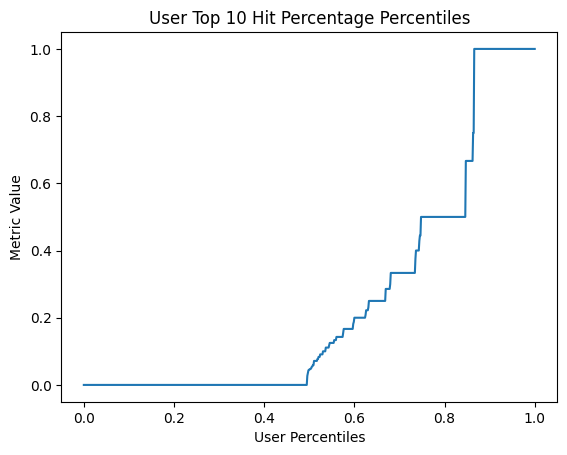

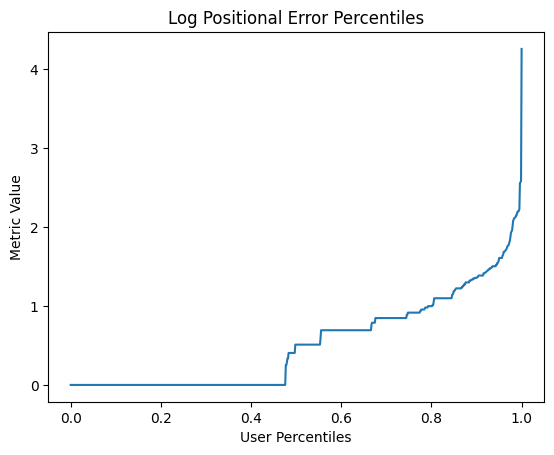

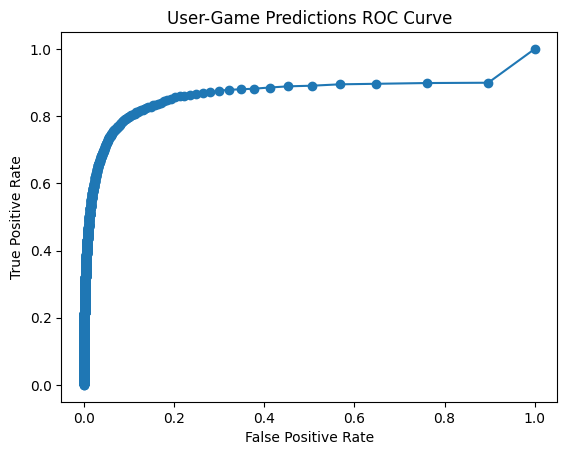

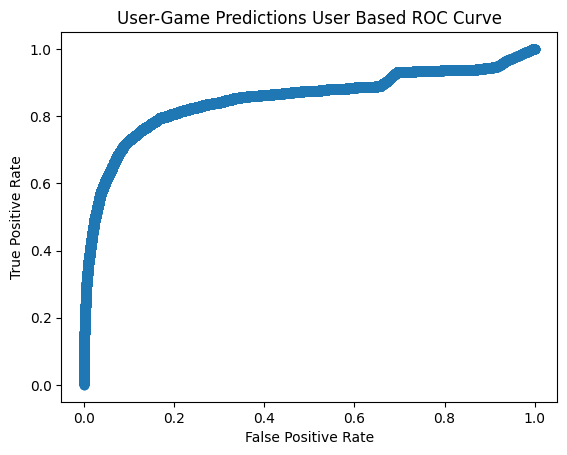

In [5]:
evaluator.reset(common_neighbors_model)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 75)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 50)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 25)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.compute_user_percentile_positional_error(25)
evaluator.compute_user_percentile_positional_error(50)
evaluator.compute_user_percentile_positional_error(75)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(common_neighbors_model.name())
pprint(evaluator.metrics)
print()

collaborative_filtering
{'auc_roc': 0.8822493599131768,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.0118734240135856,
 'positional_error_at_25_user_percentile': 0.0,
 'positional_error_at_50_user_percentile': 0.0,
 'positional_error_at_75_user_percentile': 1.3333333333333333,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'score_absolute_error_mean': 0.3741035878810612,
 'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.03433984606275903,
 'top_10_hit_percentage_at_25_user_percentile': 0.0,
 'top_10_hit_percentage_at_50_user_percentile': 0.0,
 'top_10_hit_percentage_at_75_user_percentile': 0.0,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.7684482357921227,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



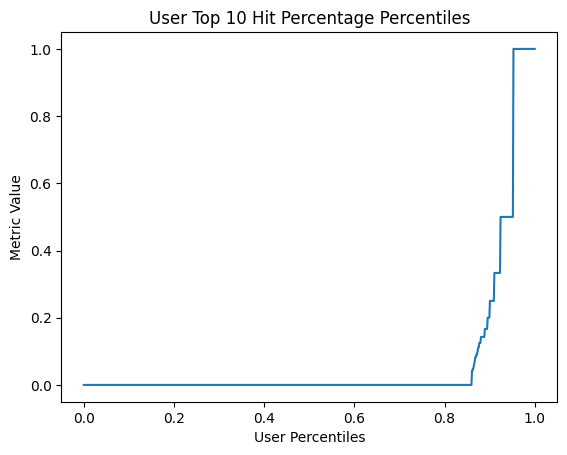

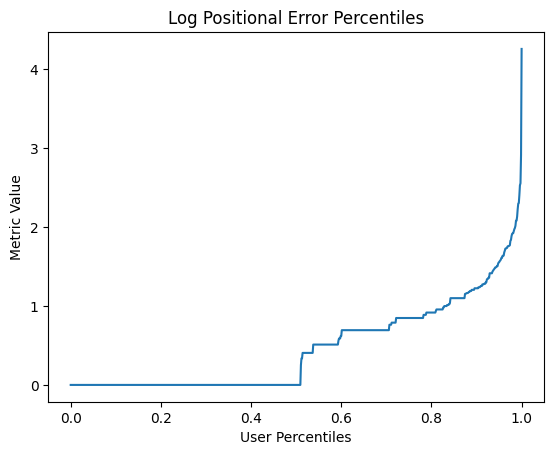

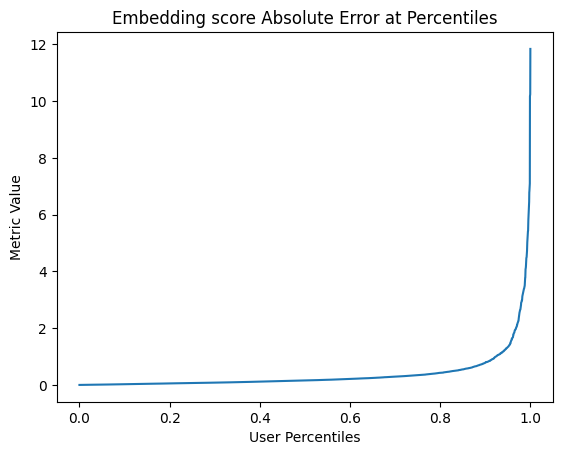

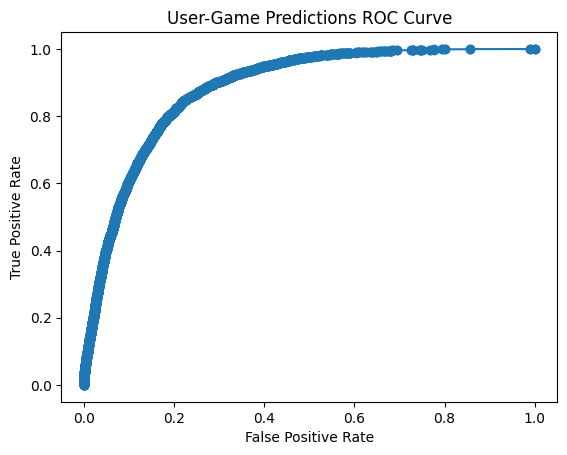

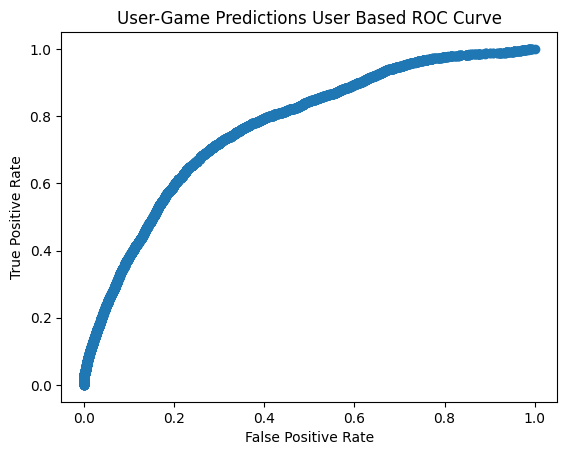

In [6]:
evaluator.reset(collaborative_filtering_model)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 75)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 50)
evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 25)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.compute_user_percentile_positional_error(25)
evaluator.compute_user_percentile_positional_error(50)
evaluator.compute_user_percentile_positional_error(75)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.compute_embedding_mean_absolute_error('score')
evaluator.plot_embedding_percentile_absolute_error('score')
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(collaborative_filtering_model.name())
pprint(evaluator.metrics)
print()

In [7]:
# Linear 0.0 - 1.0. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.2624548488519872,
#  'mean_positional_accuracy': 1.1080676423367724,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.4,
#  'positional_accuracy_at_75_user_percentile': 1.3333333333333333,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.08306404503260398,
#  'top_10_hit_percentage': 0.04706927175843695,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.4626781951301976,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.1 - 1.0. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.32906387344533383,
#  'mean_positional_accuracy': 1.0727349547901788,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.0,
#  'positional_accuracy_at_75_user_percentile': 1.3333333333333333,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.0802670835179918,
#  'top_10_hit_percentage': 0.04322084073416223,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.6265025651588524,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.5 - 1.0. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.850272260168788,
#  'mean_positional_accuracy': 1.0490319100614587,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.5,
#  'positional_accuracy_at_75_user_percentile': 1.3333333333333333,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.10745767997735144,
#  'top_10_hit_percentage': 0.037892243931320305,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.8279208608592943,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.95 - 1.0. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.903324845267819,
#  'mean_positional_accuracy': 1.0638567654236313,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.18253968253968253,
#  'positional_accuracy_at_75_user_percentile': 1.3333333333333333,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.2526411825975077,
#  'top_10_hit_percentage': 0.04914150384843102,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.8305757694127186,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# 1.0. reg: 0.00. Score 1.0
# collaborative_filtering
# {'auc_roc': 0.902385302058243,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.3088103963141593,
#  'top_10_hit_percentage': 0.04381290704558911,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.8291321442286401,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.8815005640014273,
#  'mean_positional_accuracy': 1.0036334930040225,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.0,
#  'positional_accuracy_at_75_user_percentile': 1.3333333333333333,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.37051943308128826,
#  'top_10_hit_percentage': 0.03404381290704559,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.7674414486770883,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 0.0 mean 1.0 std. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.2648346493267875,
#  'mean_positional_accuracy': 1.0950698894022208,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.5,
#  'positional_accuracy_at_75_user_percentile': 1.3333333333333333,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4231719883763354,
#  'top_10_hit_percentage': 0.04884547069271759,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.3282898566440835,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.8033583633976665,
#  'mean_positional_accuracy': 0.9674672715591154,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.0,
#  'positional_accuracy_at_75_user_percentile': 1.3333333333333333,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.17603159761097514,
#  'top_10_hit_percentage': 0.03937240970988751,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.747005230182369,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile then Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime
# collaborative_filtering
# {'auc_roc': 0.7508464981685113,
#  'mean_positional_accuracy': 0.9363920463531673,
#  'positional_accuracy_at_25_user_percentile': 0.0,
#  'positional_accuracy_at_50_user_percentile': 0.0,
#  'positional_accuracy_at_75_user_percentile': 1.2375,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.6886733048427978,
#  'top_10_hit_percentage': 0.040556542332741266,
#  'top_10_hit_percentage_at_25_user_percentile': 0.0,
#  'top_10_hit_percentage_at_50_user_percentile': 0.0,
#  'top_10_hit_percentage_at_75_user_percentile': 0.0,
#  'user_based_auc_roc': 0.6445371152979551,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}